# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Jialiang Ji
- Leyi Shang
- Yabo Shi
- Kegan Wong
- Tram Nguyen

# Group Members IDs

- A14711559 Jialiang Ji, jij106@ucsd.edu
- A13718465
- A########
- A########

# Research Question

What is the relationship between overall internet usage and socioeconomic level(house income, education level, age, quality of life, relative urbanization) of each county in the United States. More specifically, do county with higher education level and household income tend to have a larger proportion of population having access to the internet?

## Background and Prior Work

Background 
Draft: The American Community Survey (ACS) is a yearly survey which collects data about the United States, covering various fields such as education and employment. Since 2013, the survey started asking questions about internet use. These statistics were organized together and published by the end of each year. In 2016, the survey reported that in Douglas County, about 5% of U.S households surveyed did not have a computer, and 10% of U.S households surveyed did not have an internet subscription.
In 2018, the Pew Research Center produced a chart to visualize internet usage in the U.S, but the details of the data were hidden and no analysis were provided. From the chart we can only infer that some characteristics of people without internet are: aged over 65, with an annual income below 30k, failed to attend highschool, or living in the rural region. Then, another report written by Camille Ryan in the same year suggested that there were some regional differences across the country. But his report mainly focused more on comparing and contrasting the sets of survey questions instead of exploring the correlation between region, race and internet use.
The prior works only give board conclusions and fail to address the details of internet usage across region and race. We aim to expand on the topic and thoroughly explore how does internet use changes across region. Furthermore, we will relate the differences to social factors such as race and poverty.

Reference: 
- 1).American fact finder: TYPES OF COMPUTERS AND INTERNET SUBSCRIPTIONS  https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_1YR_S2801&prodType=table
- 2).Pew Research Center: 11% of Americans don’t use the internet. Who are they?
https://www.pewresearch.org/fact-tank/2018/03/05/some-americans-dont-use-the-internet-who-are-they/
- 3).United States Census:Computer and Internet Use in the United States: 2016
https://www.census.gov/library/publications/2018/acs/acs-39.html

# Hypothesis


We predict that a high socioeconomic level does have a strong relationship with its county’s internet usage. In other words, if a county tend to have an average of lower educational level or a bigger population of below poverty residents compared to other counties, they will more likely have a higher tendency without internet accessibility.

# Dataset(s)

- First Dataset
- Dataset Name: Kaggle_internet.csv
- Link to the dataset: https://www.kaggle.com/madaha/people-without-internet?fbclid=IwAR1AU733ujLR35XlWMy4fyhiNOaOZ_A62CucqdJZgAuf-4-88OcOh5gt8Dc#kaggle_internet.csv
- Number of observations: 820
- For this dataset, it describe the different precentage of internet for 820 cities. This DataSet also gives the ethnic distribution and education level of different cities.
- Second Dataset
- Dataset Name: Small Area Income and Poverty Estimates (SAIPE)
- Link to the dataset:https://www.census.gov/data-tools/demo/saipe/#/?map_geoSelector=mhi_c&s_year=2017&s_measures=mhi_snc&s_state=
- Number of observations: 3192
- This DataSet gives the Poverty Rate and Income for different cities.



# Setup

In [1]:
## YOUR CODE HERE
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
import datetime

# Significance Test
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# NLP
import re
from nltk.corpus import stopwords

# Data Cleaning

We use sqlite to merge these two dataset together.
- 1. download this two dataset.
- 2. open the csv file in the DB broser.
- 3. use terminal to open the database.
- 4. change the Kaggle_internet's column name: merge the "county" and "state" together by 'UPDATE TABLE' commend to create a new column which name is "countyState".
- 5. use 'Create Table new Select a.*, b.* from Kaggle_internet a, SAIPE b where a.countyState=b.Name' to Create a new Database which name is "new".
- 6. next we are going to delete the null value by python.

In [2]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
# Load the dataset 
df = pd.read_csv("./new.csv")
df.head(n=20)

,countyState,GEOID,lon,lat,P_total,P_white,P_black,P_asian,P_native,P_hawaiian,...,UnderAge5inPovertyCountUB90%,90%ConfidenceInterval(UnderAge5inPovertyCount),UnderAge5inPovertyPercent,UnderAge5inPovertyPercentLB90%,UnderAge5inPovertyPercentUB90%,90%ConfidenceInterval(UnderAge5inPovertyPercent),MedianHouseholdIncomeinDollars,MedianHouseholdIncomeinDollarsLB90%,MedianHouseholdIncomeinDollarsUB90%,90%ConfidenceInterval(MedianHouseholdIncomeinDollars)
0,Fairbanks North Star Borough (AK),05000US02090,-146.599867,64.690832,100605,75501.0,4385.0,3875.0,7427.0,503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$74,241","$68,171","$80,311","$68,171 to $80,311"
1,Matanuska-Susitna Borough (AK),05000US02170,-149.407974,62.182173,104365,86314.0,1019.0,1083.0,5455.0,141.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$72,296","$67,381","$77,211","$67,381 to $77,211"
2,Baldwin County (AL),05000US01003,-87.746067,30.659218,208563,180484.0,18821.0,914.0,1383.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$56,607","$52,439","$60,775","$52,439 to $60,775"
3,Calhoun County (AL),05000US01015,-85.822513,33.771706,114611,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$45,937","$43,419","$48,455","$43,419 to $48,455"
4,Cullman County (AL),05000US01043,-86.869267,34.131923,82471,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$45,925","$41,985","$49,865","$41,985 to $49,865"
5,DeKalb County (AL),05000US01049,-85.803992,34.460929,70900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$39,906","$36,346","$43,466","$36,346 to $43,466"
6,Elmore County (AL),05000US01051,-86.142739,32.597229,81799,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$59,652","$55,049","$64,255","$55,049 to $64,255"
7,Etowah County (AL),05000US01055,-86.034420,34.047638,102564,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$41,791","$38,946","$44,636","$38,946 to $44,636"
8,Houston County (AL),05000US01069,-85.296398,31.158193,104056,71838.0,27762.0,1054.0,443.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$44,753","$42,919","$46,587","$42,919 to $46,587"
9,Jefferson County (AL),05000US01073,-86.896536,33.553444,659521,340506.0,279979.0,8366.0,1799.0,323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$50,731","$49,512","$51,950","$49,512 to $51,950"


In [3]:
# drop irrevalent columns
df.drop(['UnderAge5inPovertyCountLB90%','UnderAge5inPovertyCount','UnderAge5SAIPEPovertyUniverse','90%ConfidenceInterval(UnderAge5inPovertyPercent)','UnderAge5inPovertyPercentUB90%','UnderAge5inPovertyPercentLB90%','UnderAge5inPovertyPercent','UnderAge5inPovertyCountUB90%','90%ConfidenceInterval(UnderAge5inPovertyCount)'], axis=1, inplace=True)

df.head(n=20)

,countyState,GEOID,lon,lat,P_total,P_white,P_black,P_asian,P_native,P_hawaiian,...,Ages5to17inFamiliesinPovertyCountUB90%,90%ConfidenceInterval(Ages5to17inFamiliesinPovertyCount),Ages5to17inFamiliesinPovertyPercent,Ages5to17inFamiliesinPovertyPercentLB90%,Ages5to17inFamiliesinPovertyPercentUB90%,90%ConfidenceInterval(Ages5to17inFamiliesinPovertyPercent),MedianHouseholdIncomeinDollars,MedianHouseholdIncomeinDollarsLB90%,MedianHouseholdIncomeinDollarsUB90%,90%ConfidenceInterval(MedianHouseholdIncomeinDollars)
0,Fairbanks North Star Borough (AK),05000US02090,-146.599867,64.690832,100605,75501.0,4385.0,3875.0,7427.0,503.0,...,1728,"928 to 1,728",8.5,5.9,11.1,5.9 to 11.1,"$74,241","$68,171","$80,311","$68,171 to $80,311"
1,Matanuska-Susitna Borough (AK),05000US02170,-149.407974,62.182173,104365,86314.0,1019.0,1083.0,5455.0,141.0,...,2712,"1,752 to 2,712",10.9,8.5,13.3,8.5 to 13.3,"$72,296","$67,381","$77,211","$67,381 to $77,211"
2,Baldwin County (AL),05000US01003,-87.746067,30.659218,208563,180484.0,18821.0,914.0,1383.0,0.0,...,6101,"3,641 to 6,101",14.3,10.7,17.9,10.7 to 17.9,"$56,607","$52,439","$60,775","$52,439 to $60,775"
3,Calhoun County (AL),05000US01015,-85.822513,33.771706,114611,NaN,NaN,NaN,NaN,NaN,...,4976,"3,066 to 4,976",22.2,16.9,27.5,16.9 to 27.5,"$45,937","$43,419","$48,455","$43,419 to $48,455"
4,Cullman County (AL),05000US01043,-86.869267,34.131923,82471,NaN,NaN,NaN,NaN,NaN,...,3072,"1,790 to 3,072",18.3,13.5,23.1,13.5 to 23.1,"$45,925","$41,985","$49,865","$41,985 to $49,865"
5,DeKalb County (AL),05000US01049,-85.803992,34.460929,70900,NaN,NaN,NaN,NaN,NaN,...,4197,"2,739 to 4,197",26.5,20.9,32.1,20.9 to 32.1,"$39,906","$36,346","$43,466","$36,346 to $43,466"
6,Elmore County (AL),05000US01051,-86.142739,32.597229,81799,NaN,NaN,NaN,NaN,NaN,...,2719,"1,541 to 2,719",15.9,11.5,20.3,11.5 to 20.3,"$59,652","$55,049","$64,255","$55,049 to $64,255"
7,Etowah County (AL),05000US01055,-86.034420,34.047638,102564,NaN,NaN,NaN,NaN,NaN,...,5144,"3,594 to 5,144",27.3,22.5,32.1,22.5 to 32.1,"$41,791","$38,946","$44,636","$38,946 to $44,636"
8,Houston County (AL),05000US01069,-85.296398,31.158193,104056,71838.0,27762.0,1054.0,443.0,0.0,...,4799,"3,585 to 4,799",23.8,20.3,27.3,20.3 to 27.3,"$44,753","$42,919","$46,587","$42,919 to $46,587"
9,Jefferson County (AL),05000US01073,-86.896536,33.553444,659521,340506.0,279979.0,8366.0,1799.0,323.0,...,25328,"19,258 to 25,328",20.8,18.0,23.6,18.0 to 23.6,"$50,731","$49,512","$51,950","$49,512 to $51,950"


In [4]:
#df.drop(['StateCountyName', 'CountyID', 'State', 'Year', 'P_below_poverty','P_bachelor_and_above','P_some_college','P_high_school_equivalent','P_some_high_school','P_below_middle_school','lat','lon','GEOID'], axis=1, inplace=True)
df.drop(['CountyID', 'Year','lat','lon','GEOID', 'P_white','P_black','P_asian','P_native','P_hawaiian','P_others',
         'AllAgesinPovertyCountLB90%','AllAgesinPovertyCountUB90%','90%ConfidenceInterval(AllAgesinPovertyCount)',
         'AllAgesinPovertyPercentLB90%','AllAgesinPovertyPercentUB90%','90%ConfidenceInterval(AllAgesinPovertyPercent)',
        'UnderAge18inPovertyCountLB90%','UnderAge18inPovertyCountUB90%','90%ConfidenceInterval(UnderAge18inPovertyCount)',
        'Ages5to17inFamiliesinPovertyCountLB90%','Ages5to17inFamiliesinPovertyCountUB90%','90%ConfidenceInterval(Ages5to17inFamiliesinPovertyCount)',
        'Ages5to17inFamiliesinPovertyPercentLB90%','Ages5to17inFamiliesinPovertyPercentUB90%','90%ConfidenceInterval(Ages5to17inFamiliesinPovertyPercent)',
        'MedianHouseholdIncomeinDollarsLB90%','MedianHouseholdIncomeinDollarsUB90%','90%ConfidenceInterval(MedianHouseholdIncomeinDollars)',
        'UnderAge18inPovertyPercentLB90%','UnderAge18inPovertyPercentUB90%','median_rent_per_income','90%ConfidenceInterval(UnderAge18inPovertyPercent)'],
         axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 24 columns):
countyState                                816 non-null object
P_total                                    816 non-null int64
P_below_middle_school                      814 non-null float64
P_some_high_school                         814 non-null float64
P_high_school_equivalent                   814 non-null float64
P_some_college                             814 non-null float64
P_bachelor_and_above                       814 non-null float64
P_below_poverty                            816 non-null int64
median_age                                 816 non-null float64
gini_index                                 816 non-null float64
median_household_income                    816 non-null int64
percent_no_internet                        816 non-null float64
State                                      816 non-null int64
StateCountyName                            816 non-null object
AllAgesSA

In [6]:
df.head(n=800)

,countyState,P_total,P_below_middle_school,P_some_high_school,P_high_school_equivalent,P_some_college,P_bachelor_and_above,P_below_poverty,median_age,gini_index,...,AllAgesSAIPEPovertyUniverse,AllAgesinPovertyCount,AllAgesinPovertyPercent,UnderAge18SAIPEPovertyUniverse,UnderAge18inPovertyCount,UnderAge18inPovertyPercent,Ages5to17inFamiliesSAIPEPovertyUniverse,Ages5to17inFamiliesinPovertyCount,Ages5to17inFamiliesinPovertyPercent,MedianHouseholdIncomeinDollars
0,Fairbanks North Star Borough (AK),100605,924.0,1527.0,14725.0,24570.0,19257.0,9580,30.6,0.3756,...,94772,7051,7.4,23191,2095,9.0,15657,1328,8.5,"$74,241"
1,Matanuska-Susitna Borough (AK),104365,337.0,2755.0,21071.0,28472.0,12841.0,9893,34.2,0.4351,...,103931,11768,11.3,28054,3559,12.7,20402,2232,10.9,"$72,296"
2,Baldwin County (AL),208563,3245.0,10506.0,41822.0,46790.0,43547.0,23375,42.4,0.4498,...,209922,21199,10.1,45790,6734,14.7,34058,4871,14.3,"$56,607"
3,Calhoun County (AL),114611,2455.0,8853.0,24761.0,26625.0,12909.0,18193,39.1,0.4692,...,111883,19832,17.7,24510,5932,24.2,18098,4021,22.2,"$45,937"
4,Cullman County (AL),82471,3273.0,8398.0,18481.0,16268.0,9732.0,11524,40.4,0.4518,...,81547,11256,13.8,18222,3407,18.7,13259,2431,18.3,"$45,925"
5,DeKalb County (AL),70900,2608.0,7356.0,15325.0,15319.0,5243.0,15029,39.8,0.4528,...,70728,13785,19.5,17277,4799,27.8,13083,3468,26.5,"$39,906"
6,Elmore County (AL),81799,835.0,5215.0,17016.0,17118.0,14645.0,11283,38.3,0.4535,...,76290,9151,12.0,18014,2979,16.5,13363,2130,15.9,"$59,652"
7,Etowah County (AL),102564,2880.0,8685.0,24731.0,22151.0,11075.0,16955,41.2,0.4477,...,100626,18257,18.1,21804,6399,29.3,15999,4369,27.3,"$41,791"
8,Houston County (AL),104056,1698.0,8156.0,21501.0,24051.0,14517.0,20571,39.5,0.4799,...,102856,17095,16.6,23748,6301,26.5,17586,4192,23.8,"$44,753"
9,Jefferson County (AL),659521,7423.0,35046.0,117923.0,135554.0,147831.0,97105,38.0,0.5145,...,643726,107752,16.7,148690,34345,23.1,107350,22293,20.8,"$50,731"


In [7]:
df.describe()

,P_total,P_below_middle_school,P_some_high_school,P_high_school_equivalent,P_some_college,P_bachelor_and_above,P_below_poverty,median_age,gini_index,median_household_income,...,State,AllAgesSAIPEPovertyUniverse,AllAgesinPovertyCount,AllAgesinPovertyPercent,UnderAge18SAIPEPovertyUniverse,UnderAge18inPovertyCount,UnderAge18inPovertyPercent,Ages5to17inFamiliesSAIPEPovertyUniverse,Ages5to17inFamiliesinPovertyCount,Ages5to17inFamiliesinPovertyPercent
count,8.160000e+02,814.000000,814.000000,8.140000e+02,8.140000e+02,8.140000e+02,8.160000e+02,816.000000,816.000000,816.000000,...,816.000000,8.160000e+02,8.160000e+02,816.000000,8.160000e+02,816.000000,816.000000,8.160000e+02,816.000000,816.000000
mean,3.347485e+05,8835.211302,15463.636364,5.774565e+04,6.502492e+04,7.578548e+04,4.463066e+04,38.668505,0.451036,58109.235294,...,29.906863,3.302793e+05,4.286965e+04,13.235049,7.541252e+04,13392.530637,17.785417,5.474769e+04,9142.265931,16.637377
std,5.889744e+05,32712.279068,31792.152022,8.930961e+04,1.073570e+05,1.423938e+05,9.121248e+04,4.718818,0.035017,15292.580705,...,15.521958,5.844228e+05,8.585264e+04,4.950553,1.338967e+05,28001.194539,7.458418,9.635660e+04,19348.761398,7.237378
min,6.257000e+04,43.000000,923.000000,5.657000e+03,8.906000e+03,4.374000e+03,2.623000e+03,24.600000,0.354400,31207.000000,...,1.000000,5.519300e+04,3.092000e+03,3.000000,8.792000e+03,772.000000,2.700000,6.282000e+03,529.000000,2.300000
25%,9.593425e+04,1150.250000,4650.500000,2.022425e+04,2.046150e+04,1.545650e+04,1.205200e+04,35.900000,0.427050,47351.500000,...,17.000000,9.324575e+04,1.202950e+04,9.700000,2.126250e+04,3510.500000,12.275000,1.552750e+04,2363.750000,11.175000
50%,1.580710e+05,2156.500000,7361.500000,3.079250e+04,3.315550e+04,2.929200e+04,2.004350e+04,38.400000,0.450050,54575.000000,...,33.000000,1.550055e+05,1.907550e+04,12.900000,3.539900e+04,5752.500000,17.250000,2.607700e+04,3937.500000,16.100000
75%,3.355508e+05,5555.500000,14846.250000,5.872125e+04,6.955400e+04,7.248250e+04,4.302375e+04,41.300000,0.473125,64911.000000,...,42.000000,3.342870e+05,4.153550e+04,16.125000,7.814700e+04,12798.250000,22.700000,5.606075e+04,8633.750000,21.300000
max,1.013792e+07,744735.000000,604335.000000,1.433558e+06,1.787322e+06,2.167313e+06,1.628305e+06,67.300000,0.594500,134464.000000,...,56.000000,1.000707e+07,1.490853e+06,37.800000,2.188918e+06,457665.000000,45.900000,1.577008e+06,321855.000000,46.200000


In [8]:
df.head(n=20)

,countyState,P_total,P_below_middle_school,P_some_high_school,P_high_school_equivalent,P_some_college,P_bachelor_and_above,P_below_poverty,median_age,gini_index,...,AllAgesSAIPEPovertyUniverse,AllAgesinPovertyCount,AllAgesinPovertyPercent,UnderAge18SAIPEPovertyUniverse,UnderAge18inPovertyCount,UnderAge18inPovertyPercent,Ages5to17inFamiliesSAIPEPovertyUniverse,Ages5to17inFamiliesinPovertyCount,Ages5to17inFamiliesinPovertyPercent,MedianHouseholdIncomeinDollars
0,Fairbanks North Star Borough (AK),100605,924.0,1527.0,14725.0,24570.0,19257.0,9580,30.6,0.3756,...,94772,7051,7.4,23191,2095,9.0,15657,1328,8.5,"$74,241"
1,Matanuska-Susitna Borough (AK),104365,337.0,2755.0,21071.0,28472.0,12841.0,9893,34.2,0.4351,...,103931,11768,11.3,28054,3559,12.7,20402,2232,10.9,"$72,296"
2,Baldwin County (AL),208563,3245.0,10506.0,41822.0,46790.0,43547.0,23375,42.4,0.4498,...,209922,21199,10.1,45790,6734,14.7,34058,4871,14.3,"$56,607"
3,Calhoun County (AL),114611,2455.0,8853.0,24761.0,26625.0,12909.0,18193,39.1,0.4692,...,111883,19832,17.7,24510,5932,24.2,18098,4021,22.2,"$45,937"
4,Cullman County (AL),82471,3273.0,8398.0,18481.0,16268.0,9732.0,11524,40.4,0.4518,...,81547,11256,13.8,18222,3407,18.7,13259,2431,18.3,"$45,925"
5,DeKalb County (AL),70900,2608.0,7356.0,15325.0,15319.0,5243.0,15029,39.8,0.4528,...,70728,13785,19.5,17277,4799,27.8,13083,3468,26.5,"$39,906"
6,Elmore County (AL),81799,835.0,5215.0,17016.0,17118.0,14645.0,11283,38.3,0.4535,...,76290,9151,12.0,18014,2979,16.5,13363,2130,15.9,"$59,652"
7,Etowah County (AL),102564,2880.0,8685.0,24731.0,22151.0,11075.0,16955,41.2,0.4477,...,100626,18257,18.1,21804,6399,29.3,15999,4369,27.3,"$41,791"
8,Houston County (AL),104056,1698.0,8156.0,21501.0,24051.0,14517.0,20571,39.5,0.4799,...,102856,17095,16.6,23748,6301,26.5,17586,4192,23.8,"$44,753"
9,Jefferson County (AL),659521,7423.0,35046.0,117923.0,135554.0,147831.0,97105,38.0,0.5145,...,643726,107752,16.7,148690,34345,23.1,107350,22293,20.8,"$50,731"


In [9]:
def standardize_income(str_in):
    str_in = str_in.lower()
    str_in = str_in.strip()
    str_in = str_in.replace('$','')
    str_in = str_in.replace(',','')
    return int(str_in)

df['MedianHouseholdIncomeinDollars'] = df['MedianHouseholdIncomeinDollars'].apply(standardize_income)
df.head(n=20)

,countyState,P_total,P_below_middle_school,P_some_high_school,P_high_school_equivalent,P_some_college,P_bachelor_and_above,P_below_poverty,median_age,gini_index,...,AllAgesSAIPEPovertyUniverse,AllAgesinPovertyCount,AllAgesinPovertyPercent,UnderAge18SAIPEPovertyUniverse,UnderAge18inPovertyCount,UnderAge18inPovertyPercent,Ages5to17inFamiliesSAIPEPovertyUniverse,Ages5to17inFamiliesinPovertyCount,Ages5to17inFamiliesinPovertyPercent,MedianHouseholdIncomeinDollars
0,Fairbanks North Star Borough (AK),100605,924.0,1527.0,14725.0,24570.0,19257.0,9580,30.6,0.3756,...,94772,7051,7.4,23191,2095,9.0,15657,1328,8.5,74241
1,Matanuska-Susitna Borough (AK),104365,337.0,2755.0,21071.0,28472.0,12841.0,9893,34.2,0.4351,...,103931,11768,11.3,28054,3559,12.7,20402,2232,10.9,72296
2,Baldwin County (AL),208563,3245.0,10506.0,41822.0,46790.0,43547.0,23375,42.4,0.4498,...,209922,21199,10.1,45790,6734,14.7,34058,4871,14.3,56607
3,Calhoun County (AL),114611,2455.0,8853.0,24761.0,26625.0,12909.0,18193,39.1,0.4692,...,111883,19832,17.7,24510,5932,24.2,18098,4021,22.2,45937
4,Cullman County (AL),82471,3273.0,8398.0,18481.0,16268.0,9732.0,11524,40.4,0.4518,...,81547,11256,13.8,18222,3407,18.7,13259,2431,18.3,45925
5,DeKalb County (AL),70900,2608.0,7356.0,15325.0,15319.0,5243.0,15029,39.8,0.4528,...,70728,13785,19.5,17277,4799,27.8,13083,3468,26.5,39906
6,Elmore County (AL),81799,835.0,5215.0,17016.0,17118.0,14645.0,11283,38.3,0.4535,...,76290,9151,12.0,18014,2979,16.5,13363,2130,15.9,59652
7,Etowah County (AL),102564,2880.0,8685.0,24731.0,22151.0,11075.0,16955,41.2,0.4477,...,100626,18257,18.1,21804,6399,29.3,15999,4369,27.3,41791
8,Houston County (AL),104056,1698.0,8156.0,21501.0,24051.0,14517.0,20571,39.5,0.4799,...,102856,17095,16.6,23748,6301,26.5,17586,4192,23.8,44753
9,Jefferson County (AL),659521,7423.0,35046.0,117923.0,135554.0,147831.0,97105,38.0,0.5145,...,643726,107752,16.7,148690,34345,23.1,107350,22293,20.8,50731


# Visualization

### 1) Education

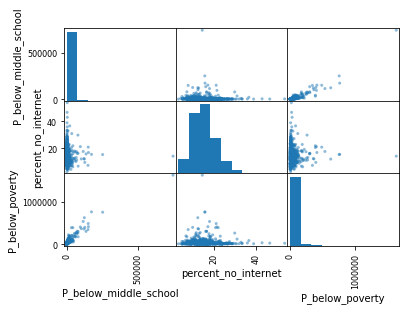

In [10]:
edu_middle = pd.plotting.scatter_matrix(df[['P_below_middle_school', 'percent_no_internet', 'P_below_poverty']])

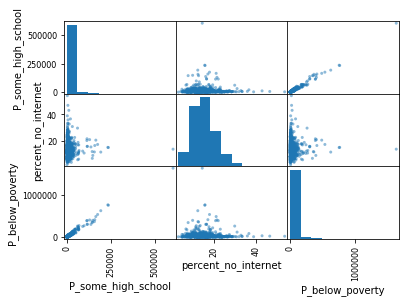

In [11]:
edu_high = pd.plotting.scatter_matrix(df[['P_some_high_school', 'percent_no_internet', 'P_below_poverty']])

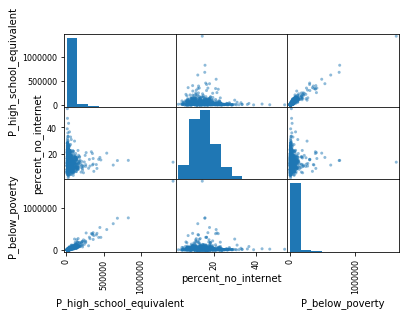

In [12]:
edu_highe = pd.plotting.scatter_matrix(df[['P_high_school_equivalent', 'percent_no_internet', 'P_below_poverty']])

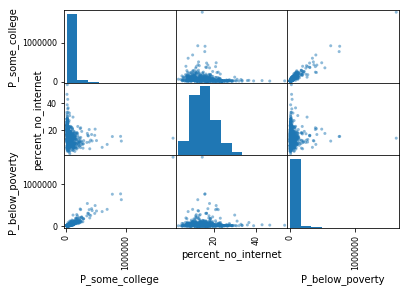

In [13]:
edu_college = pd.plotting.scatter_matrix(df[['P_some_college', 'percent_no_internet', 'P_below_poverty']])

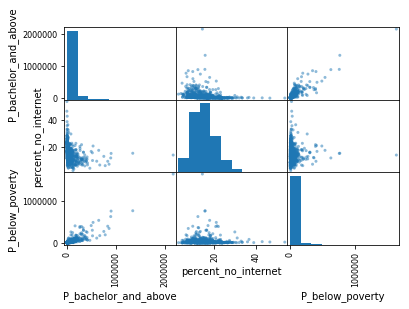

In [14]:
edu_bachelor = pd.plotting.scatter_matrix(df[['P_bachelor_and_above', 'percent_no_internet', 'P_below_poverty']])

In [15]:
def percentageEducated():
    list_PercentAboveHS = []
    list_PercentBelowHS = []
    sumTotal = 0
    sumBelowHS = 0
    
    for index,row in df.iterrows():
        
        sumTotal = (row['P_below_middle_school'] + row['P_some_high_school']
                        +row['P_high_school_equivalent']+row['P_some_college']
                            +row['P_bachelor_and_above'])
        sumBelowHS = (row['P_below_middle_school'] + row['P_some_high_school']
                        +row['P_high_school_equivalent'])
        list_PercentBelowHS.append(sumBelowHS/sumTotal)
        list_PercentAboveHS.append(1-(sumBelowHS/sumTotal))
        
    df['Percent_Population_Above_HS_Education'] = list_PercentAboveHS
    df['Percent_Population_Below_HS_Education'] = list_PercentBelowHS

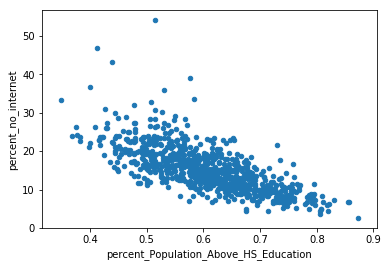

In [16]:
percentageEducated()
plt.scatter(df.Percent_Population_Above_HS_Education, df.percent_no_internet, s=20)
plt.xlabel('percent_Population_Above_HS_Education')
plt.ylabel('percent_no_internet')
f1 = plt.gcf()

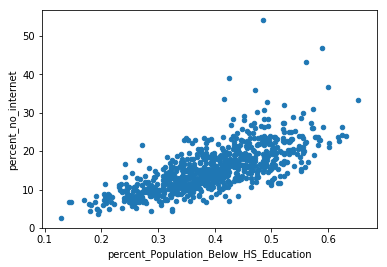

In [17]:
plt.scatter(df.Percent_Population_Below_HS_Education, df.percent_no_internet, s=20)
plt.xlabel('percent_Population_Below_HS_Education')
plt.ylabel('percent_no_internet')
f2 = plt.gcf()

### 2) Poverty level

array([[1.       , 0.6774141],
       [0.6774141, 1.       ]])

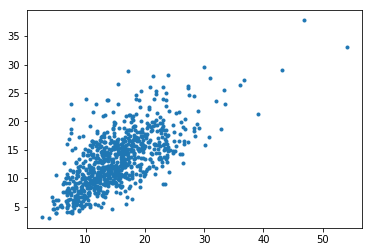

In [18]:
plt.plot(df['percent_no_internet'],df['AllAgesinPovertyPercent'],'.')
np.corrcoef(df['percent_no_internet'], df['AllAgesinPovertyPercent'])

array([[1.        , 0.74167026],
       [0.74167026, 1.        ]])

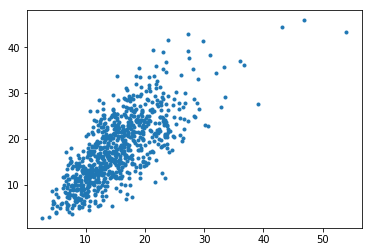

In [19]:
plt.plot(df['percent_no_internet'],df['UnderAge18inPovertyPercent'],'.')
np.corrcoef(df['percent_no_internet'], df['UnderAge18inPovertyPercent'])

array([[1.        , 0.72720536],
       [0.72720536, 1.        ]])

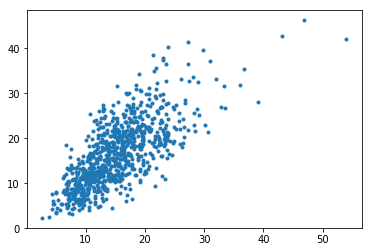

In [20]:
plt.plot(df['percent_no_internet'],df['Ages5to17inFamiliesinPovertyPercent'],'.')
np.corrcoef(df['percent_no_internet'], df['Ages5to17inFamiliesinPovertyPercent'])

### 3) Income level

array([[ 1.        , -0.70513088],
       [-0.70513088,  1.        ]])

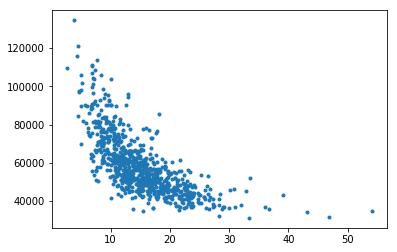

In [21]:
plt.plot(df['percent_no_internet'],df['median_household_income'],'.')
np.corrcoef(df['percent_no_internet'], df['median_household_income'])

array([[ 1.        , -0.70163273],
       [-0.70163273,  1.        ]])

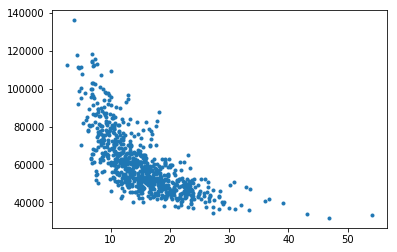

In [22]:
plt.plot(df['percent_no_internet'],df['MedianHouseholdIncomeinDollars'],'.')
np.corrcoef(df['percent_no_internet'], df['MedianHouseholdIncomeinDollars'])

### 4) Income Inequality level

array([[1.        , 0.23746369],
       [0.23746369, 1.        ]])

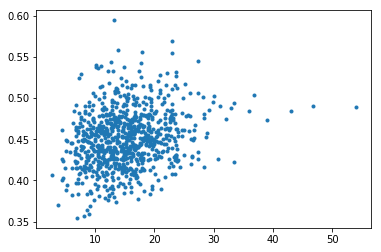

In [23]:
plt.plot(df['percent_no_internet'],df['gini_index'],'.')
np.corrcoef(df['percent_no_internet'], df['gini_index'])

### 5) Age

array([[1.        , 0.06857349],
       [0.06857349, 1.        ]])

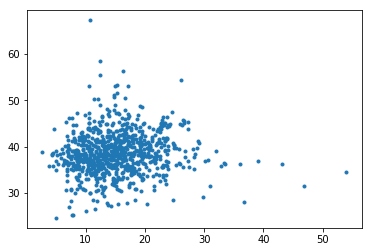

In [24]:
plt.plot(df['percent_no_internet'],df['median_age'],'.')
np.corrcoef(df['percent_no_internet'], df['median_age'])

# Geospatial Analysis

In [25]:
groupByState = dict(df.groupby(df['countyState'].str[-3:-1])['P_total'].sum())
groupByState

{'AK': 204970,
 'AL': 3630681,
 'AR': 1673132,
 'AZ': 6764001,
 'CA': 38745526,
 'CO': 4755954,
 'CT': 3576452,
 'DC': 681170,
 'DE': 952065,
 'FL': 19970450,
 'GA': 7810581,
 'HI': 1428462,
 'IA': 1622601,
 'ID': 1090160,
 'IL': 10879094,
 'IN': 4648266,
 'KS': 1778435,
 'KY': 2173786,
 'LA': 3396087,
 'MA': 6783525,
 'MD': 5738605,
 'ME': 942037,
 'MI': 8469754,
 'MN': 3900509,
 'MO': 4139912,
 'MS': 1323725,
 'MT': 626188,
 'NC': 8180205,
 'ND': 411029,
 'NE': 1043655,
 'NH': 1151684,
 'NJ': 8944469,
 'NM': 1433698,
 'NV': 2609280,
 'NY': 18741516,
 'OH': 9756400,
 'OK': 2426888,
 'OR': 3630628,
 'PA': 11818329,
 'RI': 1007359,
 'SC': 4212170,
 'SD': 296690,
 'TN': 4560050,
 'TX': 24321465,
 'UT': 2586492,
 'VA': 6080481,
 'VT': 161531,
 'WA': 6759932,
 'WI': 4404543,
 'WV': 731019,
 'WY': 179175}

In [26]:
regionMap = {('WA', 'OR', 'ID', 'MT', 'WY', 'CA', 'NV', 'UT', 'CO', 'AZ', 'NM', 'AK', 'HI'):"WEST", 
             ('ND', 'SD', 'MN', 'WI', 'MI', 'NE', 'IA', 'IL', 'IN', 'OH', 'KS', 'MO'):"MIDWEST" , 
             ('PA', 'NY', 'VT', 'NH', 'ME', 'MA', 'CT', 'RI', 'NJ'):"NORTHEAST", 
             ('TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'GA', 'FL', 'SC', 'NC', 'VA', 'WV', 'DC' 'MD', 'DE'):"SOUTH" }

In [27]:
#!pip install --user descartes

In [28]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import shapely.geometry as shp

import sklearn.neighbors as skn
import sklearn.metrics as skm

pd.options.display.max_rows = 10

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

In [29]:
usa=gpd.read_file('New_group_by_state.csv')

In [30]:
usa.head()

In [31]:
df_new = pd.read_csv("New_group_by_state.csv")
sum = df_new['sum(P_total)'].sum()
sum_middle= df_new['sum(P_below_middle_school)'].sum()
sum_high=df_new['sum(P_some_high_school)'].sum()
sum_hig_add_middle=sum_middle+sum_high
df_new['Percentage_of_Population'] = df_new['sum(P_total)']/sum
df_new['Percentage_of_Education'] = (df_new['sum(P_below_middle_school)']+df_new['sum(P_some_high_school)'])/sum_hig_add_middle
#df_new=df_new.drop('field_1',axis=1,inplace=True)


In [32]:
df_new.to_csv("New_group_by_state.csv")

In [33]:
usa=gpd.read_file('New_group_by_state.csv')

In [34]:
usa.head(n=51)

,field_1,Unnamed: 0,X,Y,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,Statename,...,sum(P_some_college),sum(P_bachelor_and_above),avg(P_below_poverty),avg(median_age),avg(gini_index),avg(median_household_income),avg(percent_no_internet),Percentage_of_Population,Percentage_of_Education,geometry
0,0,0,-155.4137715,19.58410662,Hawaii,1,15,Pacific,HI,HI,...,316915,316571,32391.0,40.875,0.444625,69966.0,13.45442234,0.005229495935374612,0.0035786977289648117,None
1,1,1,-119.72177350000001,47.27282068,Washington,2,53,Pacific,WA,WA,...,1546468,1658313,37939.789469999996,38.97894737,0.433231579,59602.05263,11.66179715,0.024747621509993805,0.018560753176736323,None
2,2,2,-109.34142040000002,46.67901478,Montana,3,30,Mountain,MT,MT,...,137904,150859,12250.5,38.58333333,0.471416667,54076.833329999994,13.78771474,0.0022924289206015685,0.0010855308959454605,None
3,3,3,-69.16275587,45.25179248,Maine,4,23,New England,ME,ME,...,200023,216792,18164.66667,43.38333333,0.44168333299999996,52368.0,15.10146814,0.0034487292363902526,0.00196443123105402,None
4,4,4,-100.4533041,47.4810782,North Dakota,5,38,West North Central,ND,ND,...,89781,92424,10666.0,32.375,0.43875,59094.75,10.55204596,0.0015047474030258357,0.0006513387607687284,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,46,46,-92.49322164,34.75466016,Arkansas,47,5,West South Central,AR,AR,...,329774,307358,22897.818180000002,36.84545455,0.453245455,48644.09091,18.76604789,0.006125215086817287,0.005505665479328804,None
47,47,47,-91.64660467,30.98049478,Louisiana,48,22,West South Central,LA,LA,...,626127,600529,37718.23529,36.27647059,0.480223529,48015.70588,20.44434462,0.012432828568543343,0.014025194671065078,None
48,48,48,-81.69981532,28.10959566,Florida,49,12,South Atlantic,FL,FL,...,4276385,4152102,69643.92683,44.91463415,0.46305609799999997,51714.63415,14.00292029,0.07311037122625727,0.0780238413344239,None
49,49,49,-86.62660324,46.158544899999995,Michigan,50,26,East North Central,MI,MI,...,1875909,1720173,42416.75862,39.53448276,0.447513793,54352.55172,15.50620929,0.031007156029787885,0.02385731075305034,None


In [35]:
usa = usa.drop(labels=['geometry'], axis=1)

In [36]:
shapes = gpd.read_file('states.shp')
shapes = shapes[['STATE_NAME', 'geometry']]
new_df = pd.merge(usa, shapes, on='STATE_NAME', how='outer')
new_df.head()

,field_1,Unnamed: 0,X,Y,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,Statename,...,sum(P_some_college),sum(P_bachelor_and_above),avg(P_below_poverty),avg(median_age),avg(gini_index),avg(median_household_income),avg(percent_no_internet),Percentage_of_Population,Percentage_of_Education,geometry
0,0,0,-155.4137715,19.58410662,Hawaii,1,15,Pacific,HI,HI,...,316915,316571,32391.0,40.875,0.444625,69966.0,13.45442234,0.005229495935374612,0.0035786977289648117,(POLYGON ((-160.0738033454681 22.0041773479577...
1,1,1,-119.72177350000001,47.27282068,Washington,2,53,Pacific,WA,WA,...,1546468,1658313,37939.789469999996,38.97894737,0.433231579,59602.05263,11.66179715,0.024747621509993805,0.018560753176736323,(POLYGON ((-122.4020153103835 48.2252163723779...
2,2,2,-109.34142040000002,46.67901478,Montana,3,30,Mountain,MT,MT,...,137904,150859,12250.5,38.58333333,0.471416667,54076.833329999994,13.78771474,0.0022924289206015685,0.0010855308959454605,POLYGON ((-111.4754253002074 44.70216236909688...
3,3,3,-69.16275587,45.25179248,Maine,4,23,New England,ME,ME,...,200023,216792,18164.66667,43.38333333,0.44168333299999996,52368.0,15.10146814,0.0034487292363902526,0.00196443123105402,(POLYGON ((-69.77727626137293 44.0741483685119...
4,4,4,-100.4533041,47.4810782,North Dakota,5,38,West North Central,ND,ND,...,89781,92424,10666.0,32.375,0.43875,59094.75,10.55204596,0.0015047474030258357,0.0006513387607687284,POLYGON ((-98.73043728833767 45.93827137024809...


In [37]:
new_df.plot?

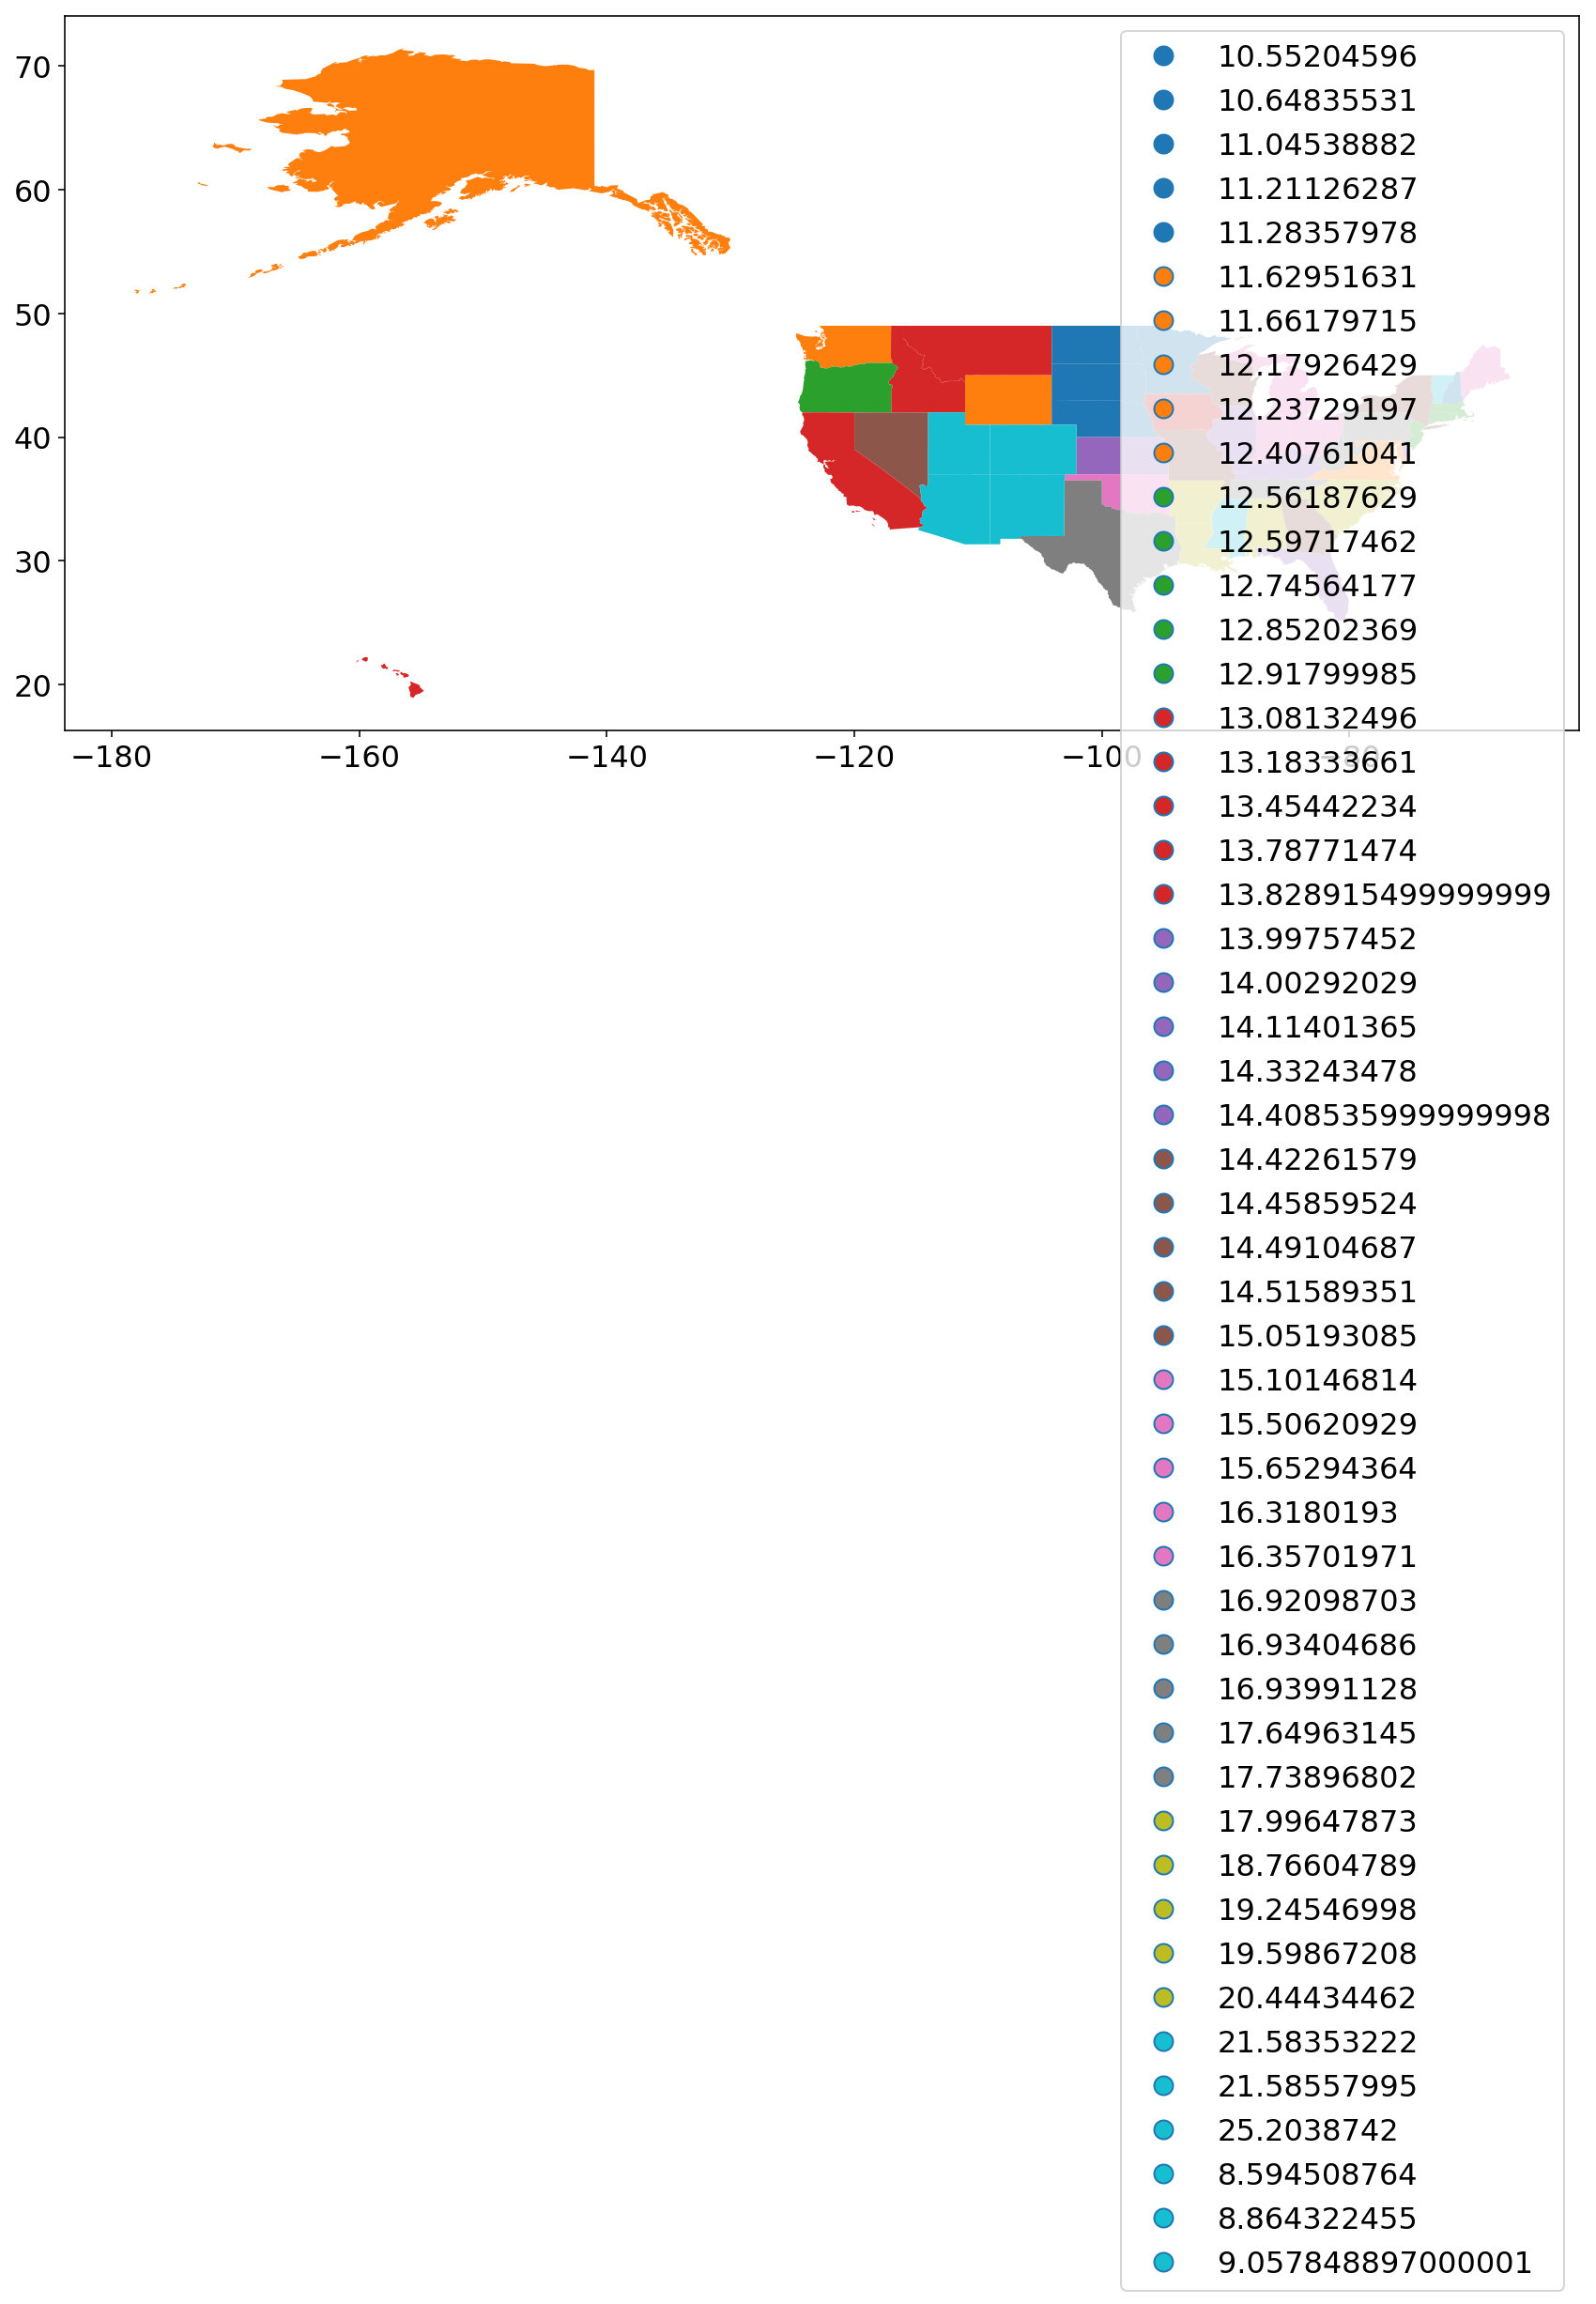

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
new_df.plot(column='avg(percent_no_internet)', ax=ax, legend=True);

#new_df['avg(percent_no_internet)'] = pd.to_numeric(new_df['avg(percent_no_internet)'])



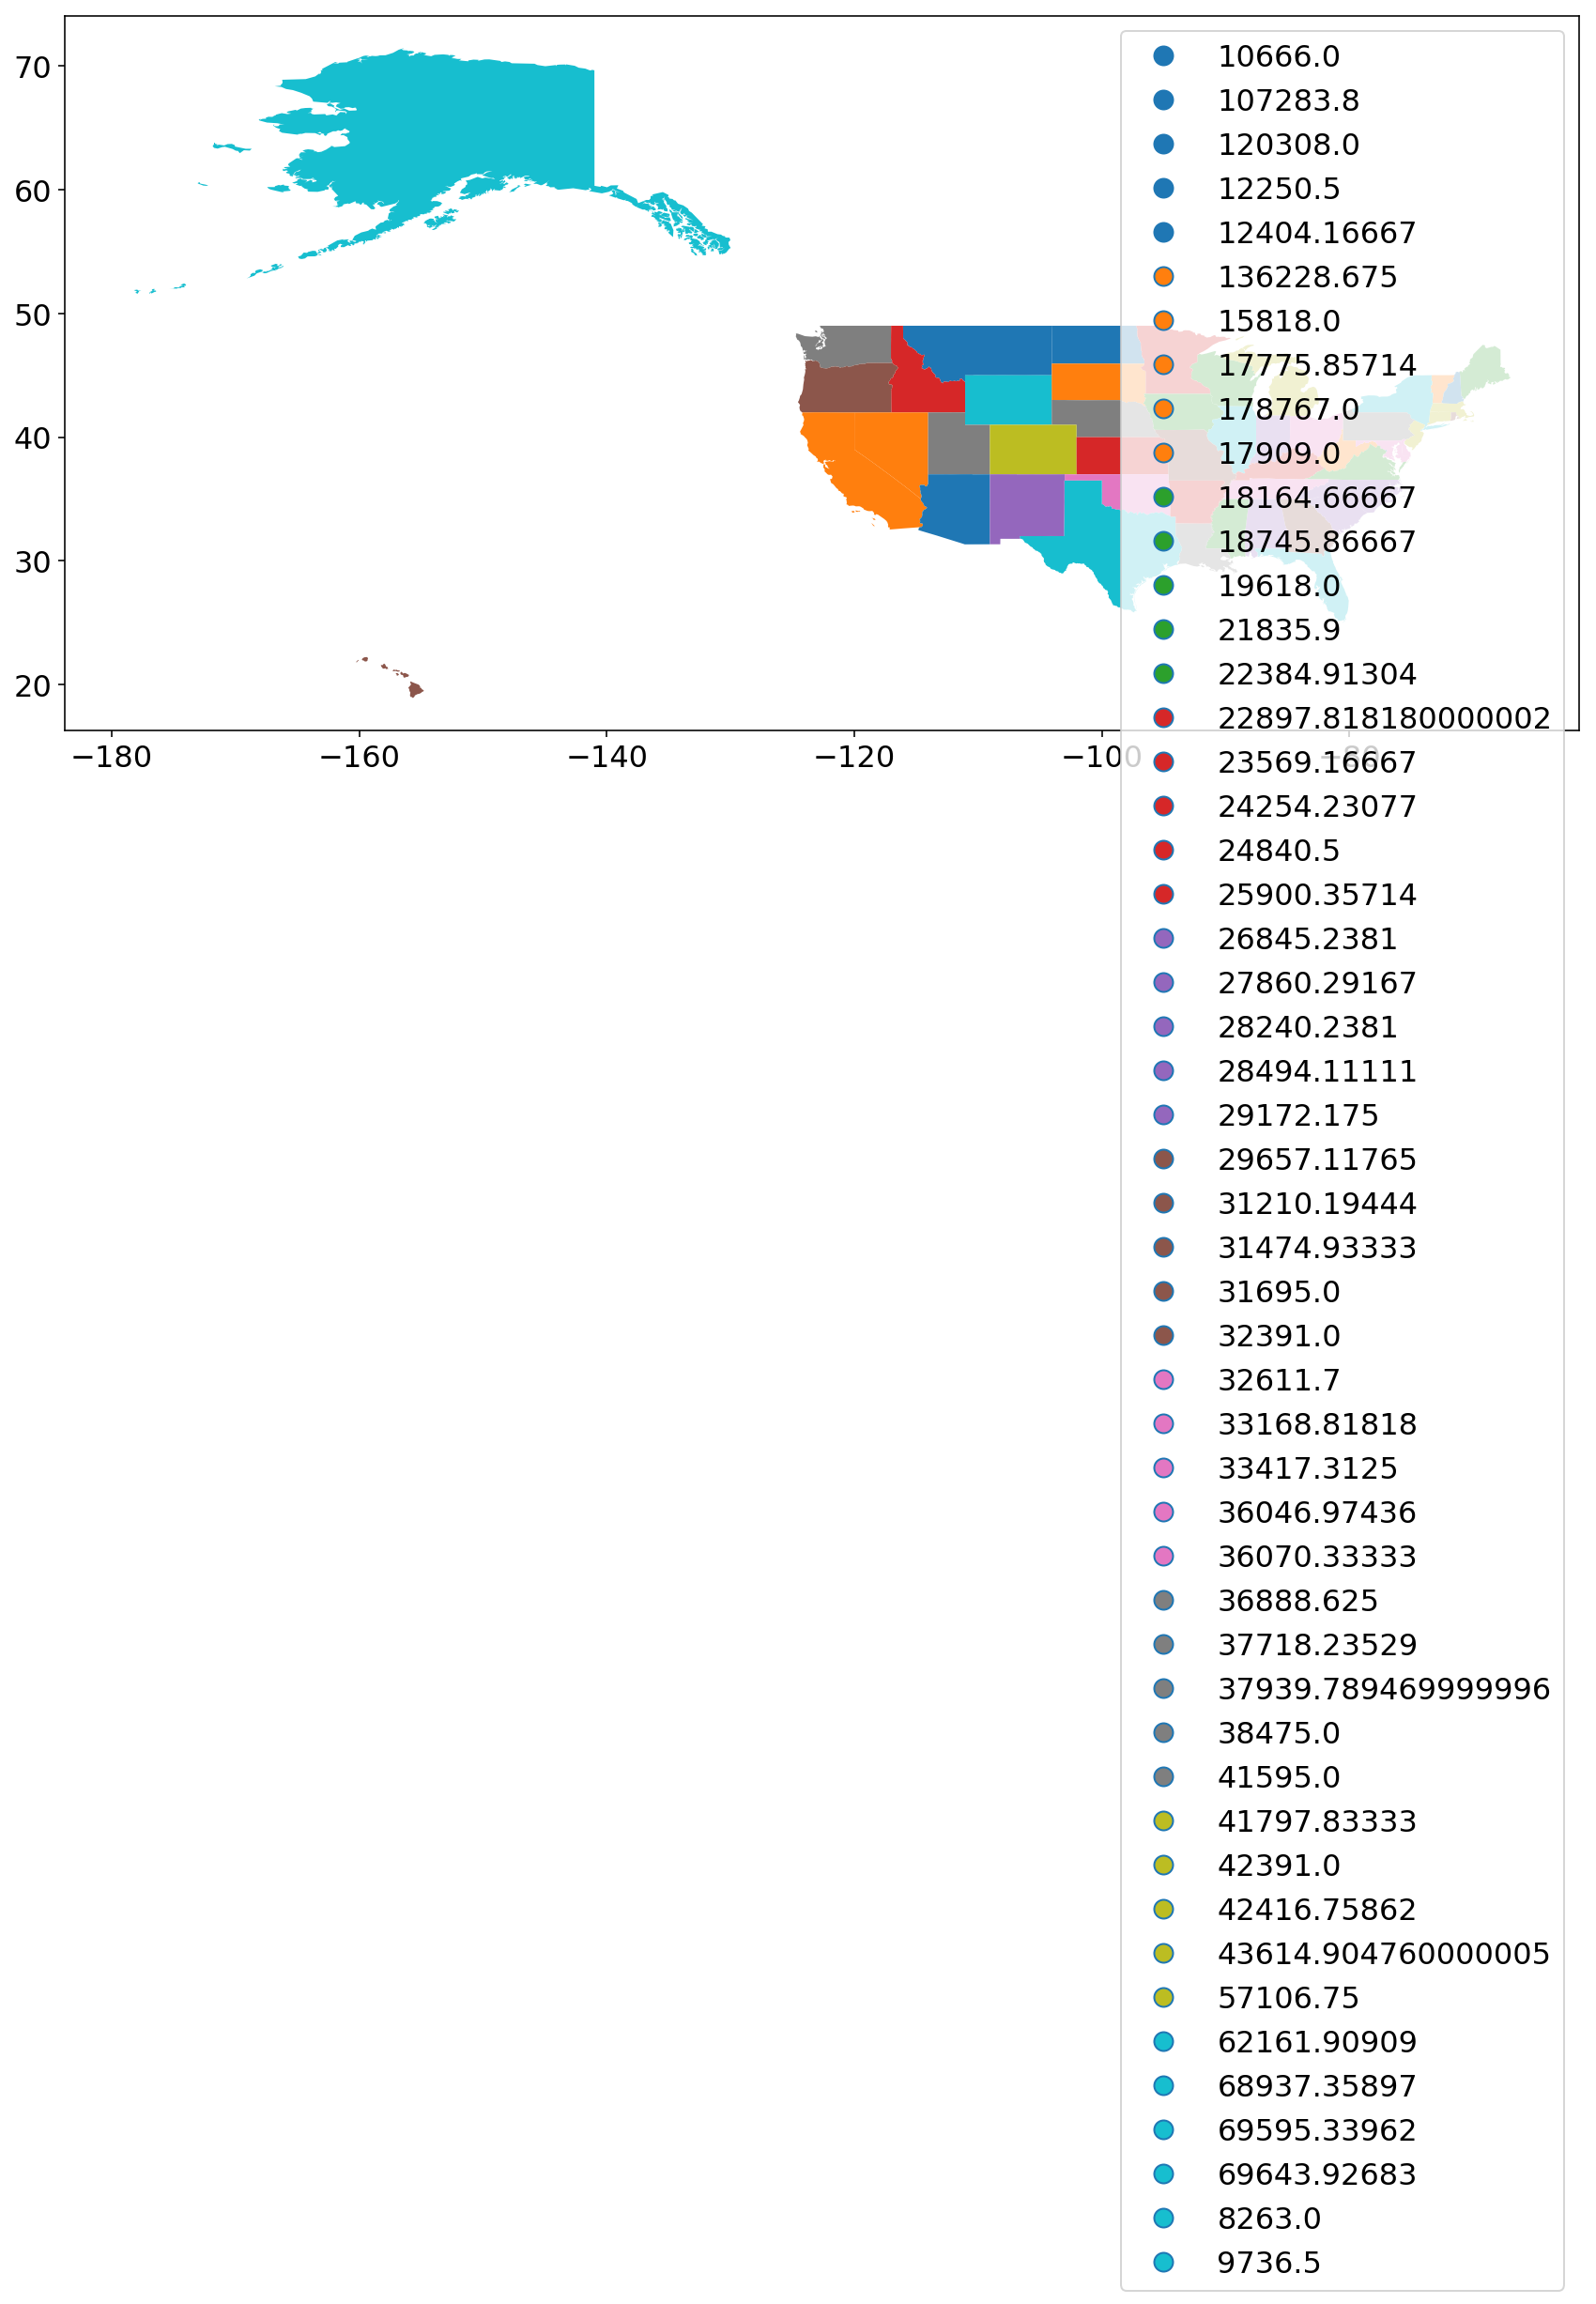

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
new_df.plot(column='avg(P_below_poverty)', ax=ax, legend=True);


new_df['avg(P_below_poverty)'] =  pd.to_numeric(new_df['avg(P_below_poverty)'])

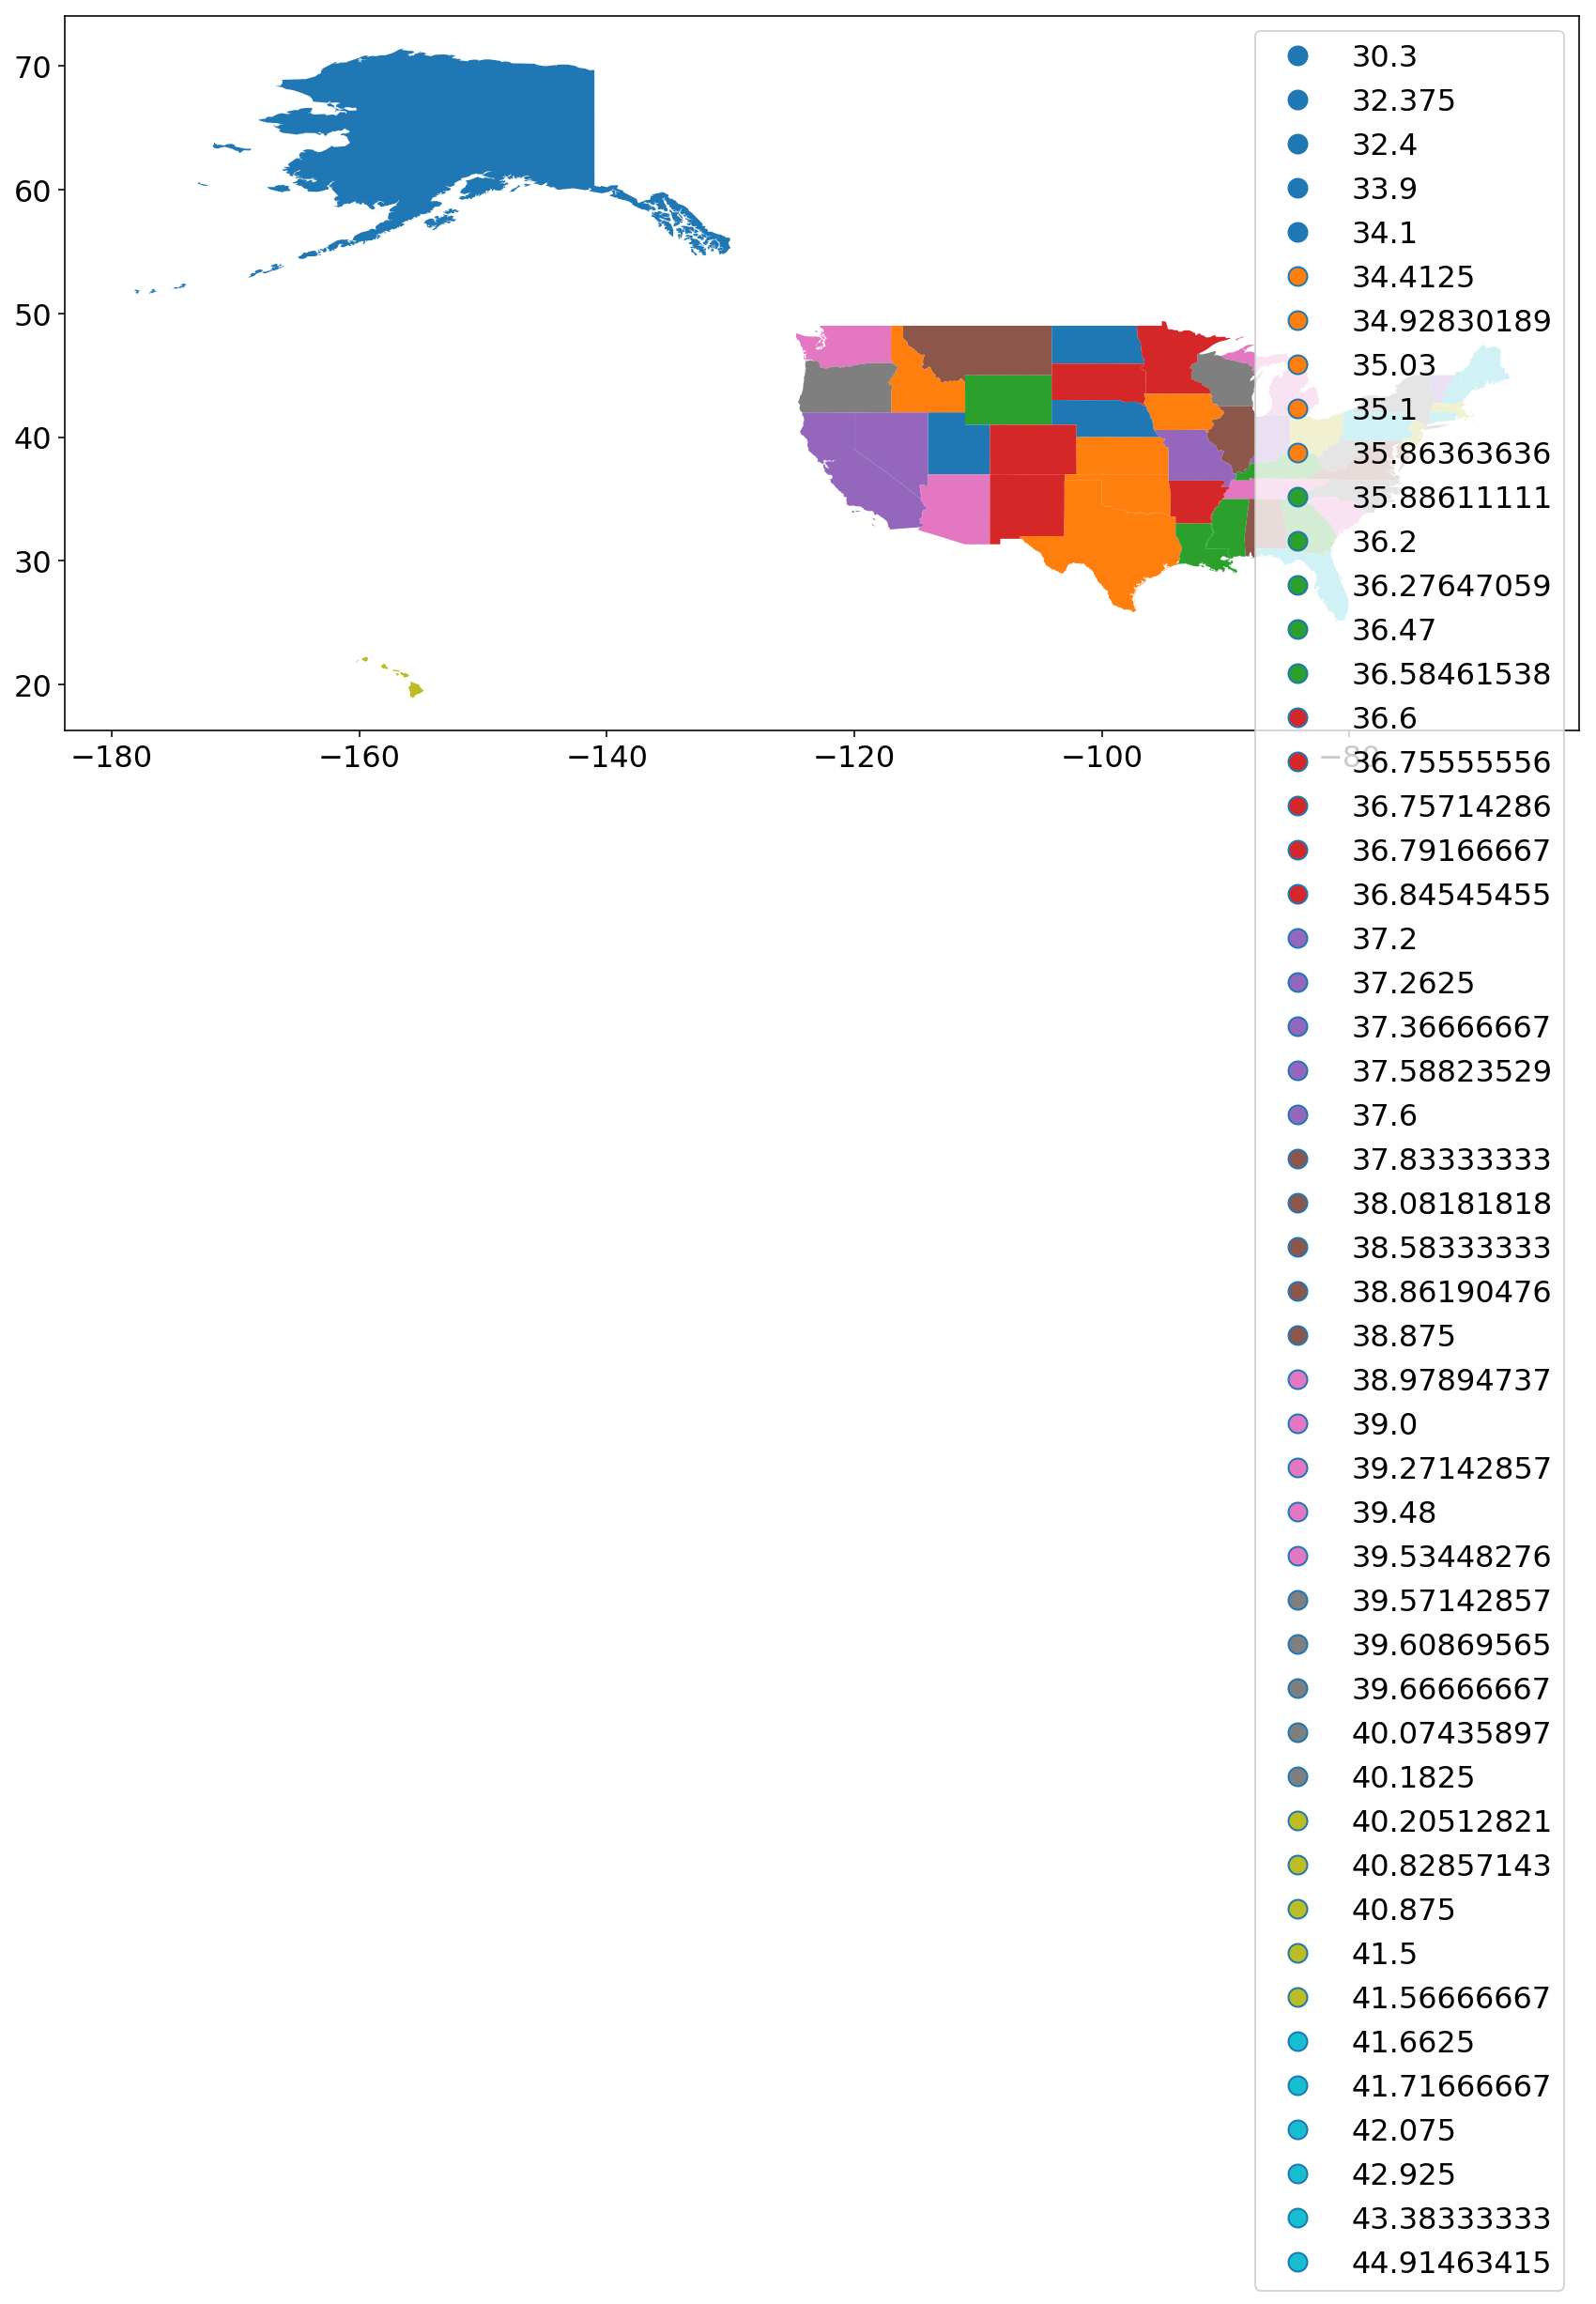

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
new_df.plot(column='avg(median_age)', ax=ax, legend=True);
#new_df['avg(median_age)'] =  pd.to_numeric(new_df['avg(median_age)'])

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

### Poverty and Internet Usage

In [41]:
# Analyze correlation between poverty and internet usage
outcome_1, predictors_1 = patsy.dmatrices('percent_no_internet ~ AllAgesinPovertyPercent', df)
mod_all = sm.OLS(outcome_1, predictors_1)
res_all = mod_all.fit()
print(res_all.summary())

                             OLS Regression Results                            
Dep. Variable:     percent_no_internet   R-squared:                       0.459
Model:                             OLS   Adj. R-squared:                  0.458
Method:                  Least Squares   F-statistic:                     690.3
Date:                 Tue, 04 Jun 2019   Prob (F-statistic):          1.15e-110
Time:                         13:51:37   Log-Likelihood:                -2353.0
No. Observations:                  816   AIC:                             4710.
Df Residuals:                      814   BIC:                             4719.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept       

# Ethics & Privacy

The US Census Bureau collects data about the economy and the people living in the United States. Their data is public on their website so we have permission to use it for our project. According to The US Census Bureau website, data are collected from a variety of sources; some are collected from surveys, some are collected as administrative data, which is data collected from the government for recordkeeping. These data are confidential and protected by the federal law. No personal information is included in any of the data from the Census Bureau, including our particular dataset. It only shows summarized that represent groups of people. Furthermore, before releasing any statistics to the public, these data have been reviewed by the Census Bureau to make sure none of the information or characteristics could identify someone. Therefore, it cannot cause harm to any person or business.
 
The dataset, however, is not complete because it has many missing values in the table, which can potentially yield incorrect results. Another concern is that we only have data for large geographic areas over 65000 population. It also only contains data in 2016, so our analysis may not reflect the current trend of Internet usage at the moment.

# Conclusion & Discussion

*Fill in your discussion information here*